Text(0, 0.5, 'Pulse Amplitude: Correlates to E')

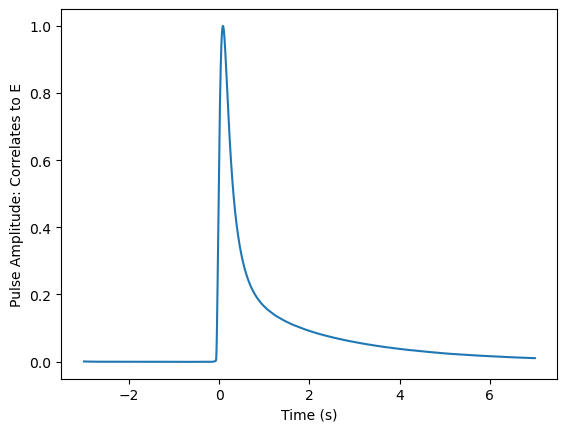

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot as up
tower2p1_events=pd.read_csv("pulse_out/Tower2p1_event_info.csv") #contains reconstruction information
pulses_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['samples'] #pulses
event_nums_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['event_number'] #event numbers to connect pulses to reconstruction info

ADC2mV=8.0108642578125e-02 ##this number should be checked with up-to-date front end board readings, but is fine for now
tower2p1_events
tower2p1_events["Channel"].unique()
CHANNEL=60 #hard-coding this for now...
file=open("average_pulse_dump/Channel00"+str(CHANNEL)+"_AveragePulse.txt")
for line in file:
    parse=line.replace("fData  ","")
    parse=parse.replace("\n","")
    splits=parse.split(" ")
    avg_pulse=np.array(splits,dtype=float)
    break

cleaned_avg_pulse=(avg_pulse-np.mean(avg_pulse[0:50]))/np.max(avg_pulse-np.mean(avg_pulse[0:50]))
#check out what normalized average pulse for channel 60 is

fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

plt.xlabel("Time (s)")
plt.ylabel("Pulse Amplitude: Correlates to E")                                      

1123.4049474985482  keV


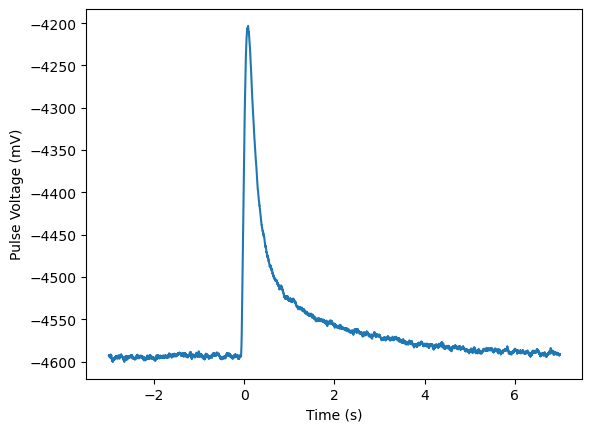

In [3]:
THIS_PULSE=8272 #pulse we'll focus on, to get nODE working
#check info on it...

#how to pass back & forth between event number & pulse id...
tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]]
THIS_ENERGY=tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]].iloc[0]['Energy']
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

In [4]:
tower2p1_events
tower2p1_events.to_csv("CUOREdata.csv", index=False)


In [5]:
pulses_tower2p1
np.save('pulses.npy', pulses_tower2p1)

In [6]:
ch60_pulses=pulses_tower2p1[tower2p1_events['Channel']==60]
ch60_events=tower2p1_events[tower2p1_events['Channel']==60]
print(len(ch60_pulses))
pick_pulse=31 # which pulse you want on the channel, between 0 & len(ch60_pulses)-1. I'm randomly choosing 32 here
this_pulse=ch60_pulses[pick_pulse] #voltage values for the pulse timestream
pulse_info=ch60_events.iloc[pick_pulse] #info for that pulse. need to access through iloc to correspond to same order as the pulse timestream\

pulses = [] 
max = -10000
n = 40
for i in range(0, n):
    pulse = ch60_pulses[i][2920:]
    pulse = pulse + np.min(pulse)*-1
    pulses.append(pulse)
    if np.min(pulse) < max:
        max = np.min(pulse)
print(max)
pulses = list(map(lambda arr: arr/max*-1, pulses))

print(len(pulses))

1822
-10000
40


[-3.        -2.9989999 -2.9979998 ...  6.9979998  6.9989999  7.       ]
[-0.07970797 -0.07870787 -0.07770777 ...  6.9979998   6.9989999
  7.        ]


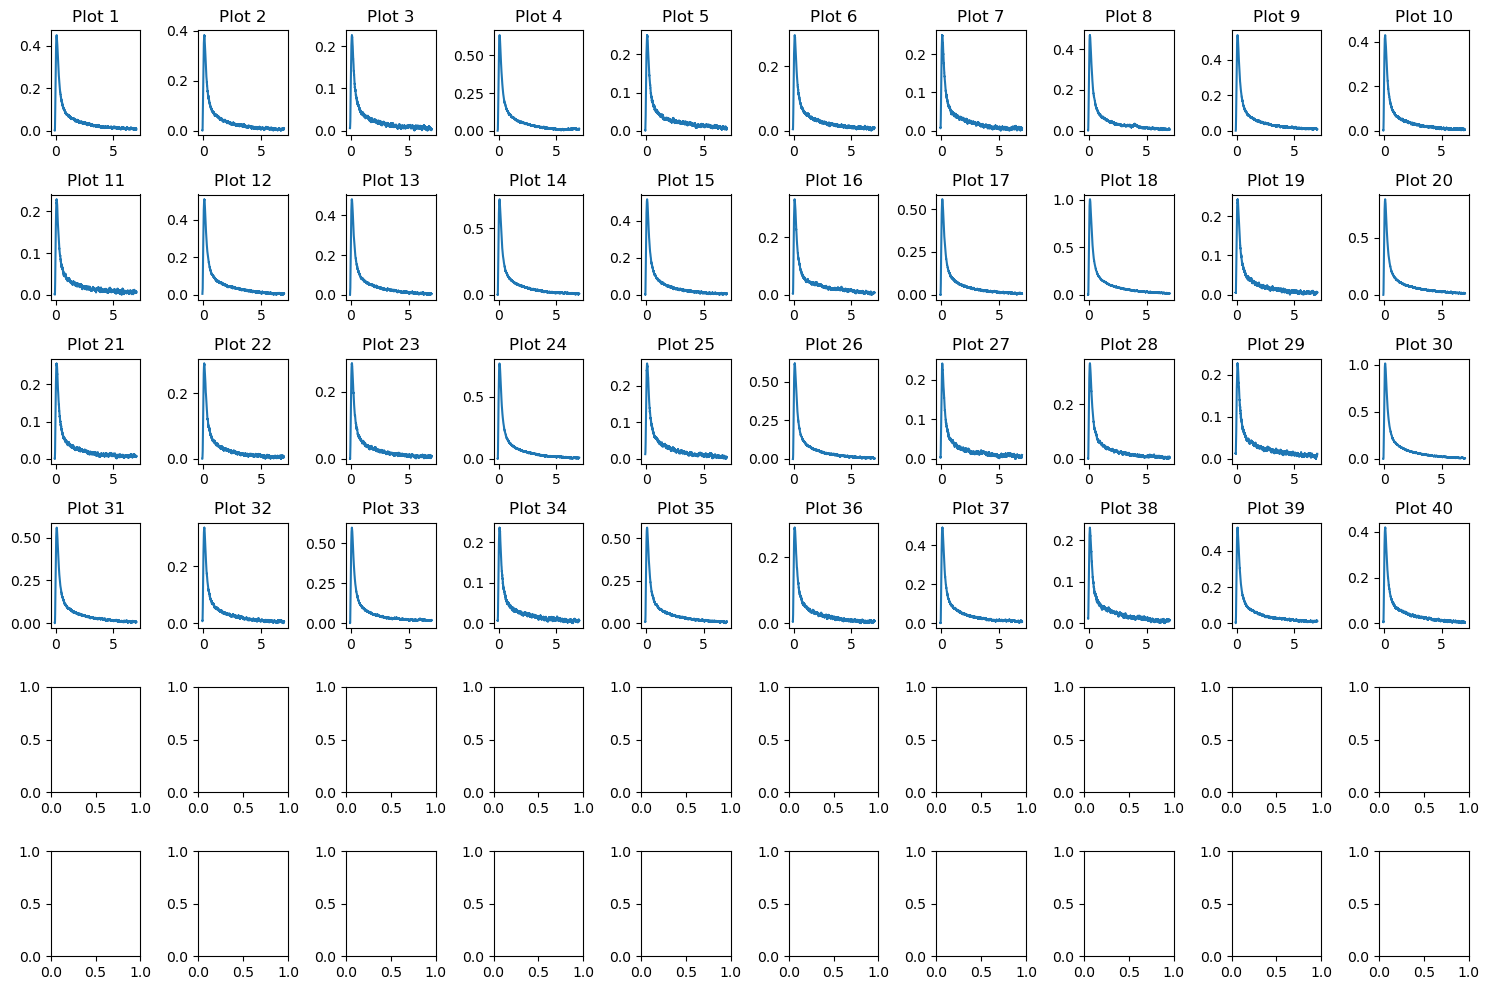

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 20 subplots (4 rows x 5 columns)
fig, axes = plt.subplots(6, 10, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array for easy iteration
axes = axes.flatten()
times = np.linspace(-3,7,10000)
print(times)
times = times[2920:]
print(times)
# Plot something in each subplot
for i in range(n):
    x = np.linspace(0, 10, 100)
    y = np.sin(x + i)  # Example: sine waves with phase shift
    axes[i].plot(times,pulses[i])
    axes[i].set_title(f'Plot {i+1}')

# Adjust layout to prevent overlap

plt.tight_layout()
plt.show()

In [53]:
import numpy as np 
import pandas as pd 

import optax
import matplotlib.pyplot as plt
from typing import List
import equinox as eqx
import jax
import jax.numpy as jnp
import time

import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax

In [54]:
vars = []

for pulse in pulses:
    vars.append([0, 10*np.max(pulse), 0])
vars = jnp.array(vars)
print(vars, vars.shape)

[[ 0.     4.503  0.   ]
 [ 0.     3.816  0.   ]
 [ 0.     2.266  0.   ]
 [ 0.     6.345  0.   ]
 [ 0.     2.504  0.   ]
 [ 0.     2.973  0.   ]
 [ 0.     2.499  0.   ]
 [ 0.     4.687  0.   ]
 [ 0.     5.406  0.   ]
 [ 0.     4.294  0.   ]
 [ 0.     2.286  0.   ]
 [ 0.     5.105  0.   ]
 [ 0.     4.809  0.   ]
 [ 0.     7.179  0.   ]
 [ 0.     5.168  0.   ]
 [ 0.     3.311  0.   ]
 [ 0.     5.567  0.   ]
 [ 0.    10.072  0.   ]
 [ 0.     2.426  0.   ]
 [ 0.     8.354  0.   ]
 [ 0.     2.55   0.   ]
 [ 0.     2.912  0.   ]
 [ 0.     2.844  0.   ]
 [ 0.     7.646  0.   ]
 [ 0.     2.602  0.   ]
 [ 0.     6.2    0.   ]
 [ 0.     2.41   0.   ]
 [ 0.     3.493  0.   ]
 [ 0.     2.268  0.   ]
 [ 0.    10.134  0.   ]
 [ 0.     5.586  0.   ]
 [ 0.     3.368  0.   ]
 [ 0.     5.98   0.   ]
 [ 0.     2.355  0.   ]
 [ 0.     5.612  0.   ]
 [ 0.     2.906  0.   ]
 [ 0.     4.899  0.   ]
 [ 0.     2.301  0.   ]
 [ 0.     5.289  0.   ]
 [ 0.     4.185  0.   ]] (40, 3)


In [75]:
length = len(pulses[0])
import math
def model_to_loss(model, y_all, t_s):
    # Solve the differential equation
    
    #print(type(t_s[0]))
    #print("MODELTOLOSS", y_s[0], z_s[0], t_s[len[t_s]])
    solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(model),
        diffrax.Tsit5(),
        t0=t_s[0],
        t1=t_s[-1],
        dt0=0.001,
        y0=vars,   
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(t_s)),
    )
    
    """y_1_all = solutions.ys[:len(solutions.ys), 0]
    y_2_all =  solutions.ys[:len(solutions.ys), 1]
    y_3_all =  solutions.ys[:len(solutions.ys), 2]"""


    y_loss = 0 
    for i in range(n):
        arr = solutions.ys[:len(solutions.ys), i]
        y = arr[:, 0]
        y_loss =  y_loss + jnp.mean((y - y_all[i][:length])**2)

     

 
    """ADC2mV y_1 = y_1_all[:, 0]
    y_2  = y_2_all[:, 0]
    y_3  = y_3_all[:, 0]"""


    all_outputs = solutions.ys

    

   
    zero_input = jnp.zeros_like(all_outputs[-1])
    zero_output = model(0, zero_input)  
    equilibrium_loss = jnp.mean(jnp.abs(zero_output) ** 2)

    #print(np.sum(max_energy - solutions.ys[:length-1, 3]).item)
    #l2_loss = reg_lambda * sum(jnp.sum(jnp.square(p)) for p in jax.tree_util.tree_leaves(model) if p.ndim > 0)
    total_loss = (y_loss/n + equilibrium_loss)
    return total_loss

class LinearFunction(eqx.Module):
    layers: list

    def __init__(self, key): 
        key1, key2, key3, key4, key5, key6, key7 = jax.random.split(key, 7)
        self.layers = [eqx.nn.Linear(n*3,80, key = key1, use_bias=True), 
                       eqx.nn.Linear(80,n*3, key = key2, use_bias=True)] 
    def __call__(self, t, y, *args):
        #print(y.shape)
        y = jnp.ravel(y)
        #print(y.shape)
        for layer in self.layers[:-1]:
            y = jax.nn.tanh(layer(y))
        y = self.layers[-1](y)
        y = y.reshape(n,3)
        return y

In [84]:
z_s = z_s = np.linspace(0, 4, length)
model_to_loss_and_grad = eqx.filter_value_and_grad(model_to_loss)
opt = optax.rmsprop(learning_rate=0.003)
key = jax.random.PRNGKey(41)
key, subkey = jax.random.split(key, 2)



def make_step(m, opt_s, y_all,t_s):
    loss, grad = model_to_loss_and_grad(eqx.filter(m, eqx.is_inexact_array), y_all, t_s)

    updates, opt_s = opt.update(grad, opt_s, m)
    m = eqx.apply_updates(m, updates)
    return m, opt_s, loss

loss_history = []
MODEL = LinearFunction(subkey)
best_loss = float('inf')
opt_state = opt.init(eqx.filter(MODEL, eqx.is_array))

#print(MODEL, opt_state, energies[0], energies[1], energies[2])
for epoch in range(10000):
    MODEL, opt_state, loss = make_step(MODEL, opt_state, pulses, times)
    loss_history.append(loss)
     # Log every 100 epochs
    if(epoch % 100 == 0) :
        print(f"Epoch {epoch}, Loss {loss}")

    if loss < best_loss:
        best_loss = loss
        best_weights = eqx.tree_serialise_leaves("best_model.eqx", MODEL)




Epoch 0, Loss 5.624831676483154
Epoch 100, Loss 0.13869909942150116
Epoch 200, Loss 0.37841862440109253
Epoch 300, Loss 0.11646575480699539
Epoch 400, Loss 0.22824285924434662
Epoch 500, Loss 0.10017839819192886
Epoch 600, Loss 0.052122052758932114
Epoch 700, Loss 0.11370225995779037
Epoch 800, Loss 0.019045056775212288
Epoch 900, Loss 0.005775487516075373
Epoch 1000, Loss 0.0021976283751428127
Epoch 1100, Loss 0.0009492734679952264
Epoch 1200, Loss 0.0009687413112260401
Epoch 1300, Loss 0.0005335950991138816
Epoch 1400, Loss 0.0004087534034624696
Epoch 1500, Loss 0.0003691987949423492
Epoch 1600, Loss 0.0003236152697354555
Epoch 1700, Loss 0.00031400518491864204
Epoch 1800, Loss 0.0002552613150328398
Epoch 1900, Loss 0.00028238940285518765
Epoch 2000, Loss 0.0002580472209956497
Epoch 2100, Loss 0.00021080192527733743
Epoch 2200, Loss 0.00021055560500826687
Epoch 2300, Loss 0.0002283191424794495
Epoch 2400, Loss 0.0002125074533978477
Epoch 2500, Loss 0.0002019914536504075
Epoch 2600, L

KeyboardInterrupt: 

In [85]:
MODEL = eqx.tree_deserialise_leaves("best_model.eqx", MODEL)

In [68]:
for epoch in range(5000):
    MODEL, opt_state, loss = make_step(MODEL, opt_state, pulses, times)
    loss_history.append(loss)
     # Log every 100 epochs
    print(f"Epoch {epoch}, Loss {loss}")

    if loss < best_loss:
        best_loss = loss
        best_weights = eqx.tree_serialise_leaves("best_model.eqx", MODEL)

MODEL = eqx.tree_deserialise_leaves("best_model.eqx", MODEL)

Epoch 0, Loss 0.002415700117126107
Epoch 1, Loss 0.0025417909491807222
Epoch 2, Loss 0.0029679611325263977
Epoch 3, Loss 0.004102818202227354
Epoch 4, Loss 0.006094946525990963
Epoch 5, Loss 0.008623553439974785
Epoch 6, Loss 0.01119217462837696
Epoch 7, Loss 0.012867746874690056
Epoch 8, Loss 0.015250962227582932
Epoch 9, Loss 0.015876563265919685
Epoch 10, Loss 0.012704496271908283
Epoch 11, Loss 0.011767086572945118
Epoch 12, Loss 0.014154970645904541
Epoch 13, Loss 0.012821968644857407
Epoch 14, Loss 0.008922154083848
Epoch 15, Loss 0.00706899119541049
Epoch 16, Loss 0.0067798076197505
Epoch 17, Loss 0.006956077180802822
Epoch 18, Loss 0.006416581105440855
Epoch 19, Loss 0.005889803171157837
Epoch 20, Loss 0.0064646522514522076
Epoch 21, Loss 0.007819551974534988
Epoch 22, Loss 0.00928159523755312
Epoch 23, Loss 0.009658535942435265
Epoch 24, Loss 0.009529734961688519
Epoch 25, Loss 0.014116424135863781
Epoch 26, Loss 0.02468339540064335
Epoch 27, Loss 0.018606899306178093
Epoch 28

KeyboardInterrupt: 

0.0001255724


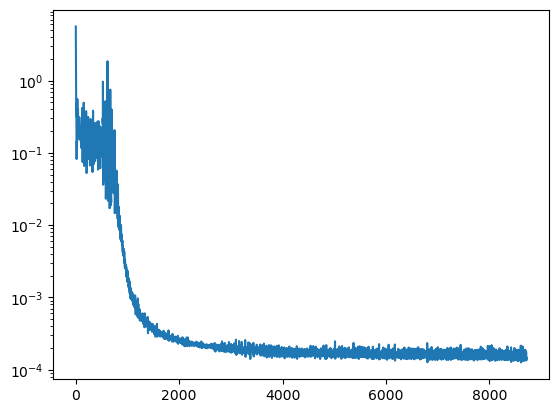

In [86]:
plt.plot(loss_history)
plt.yscale('log')
print(min(loss_history))

In [87]:
print(times)

[-0.07970797 -0.07870787 -0.07770777 ...  6.9979998   6.9989999
  7.        ]


In [88]:
solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(MODEL),
        diffrax.Tsit5(),
        t0=times[0],
        t1=times[-1],
        dt0=0.001,
        y0=vars,   
        stepsize_controller=diffrax.PIDController(rtol=1e-5, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(times)),
    )

In [89]:
predictions = [] 

for i in range(n):
    predictions.append(solutions.ys[:len(solutions.ys), i][:, 0])

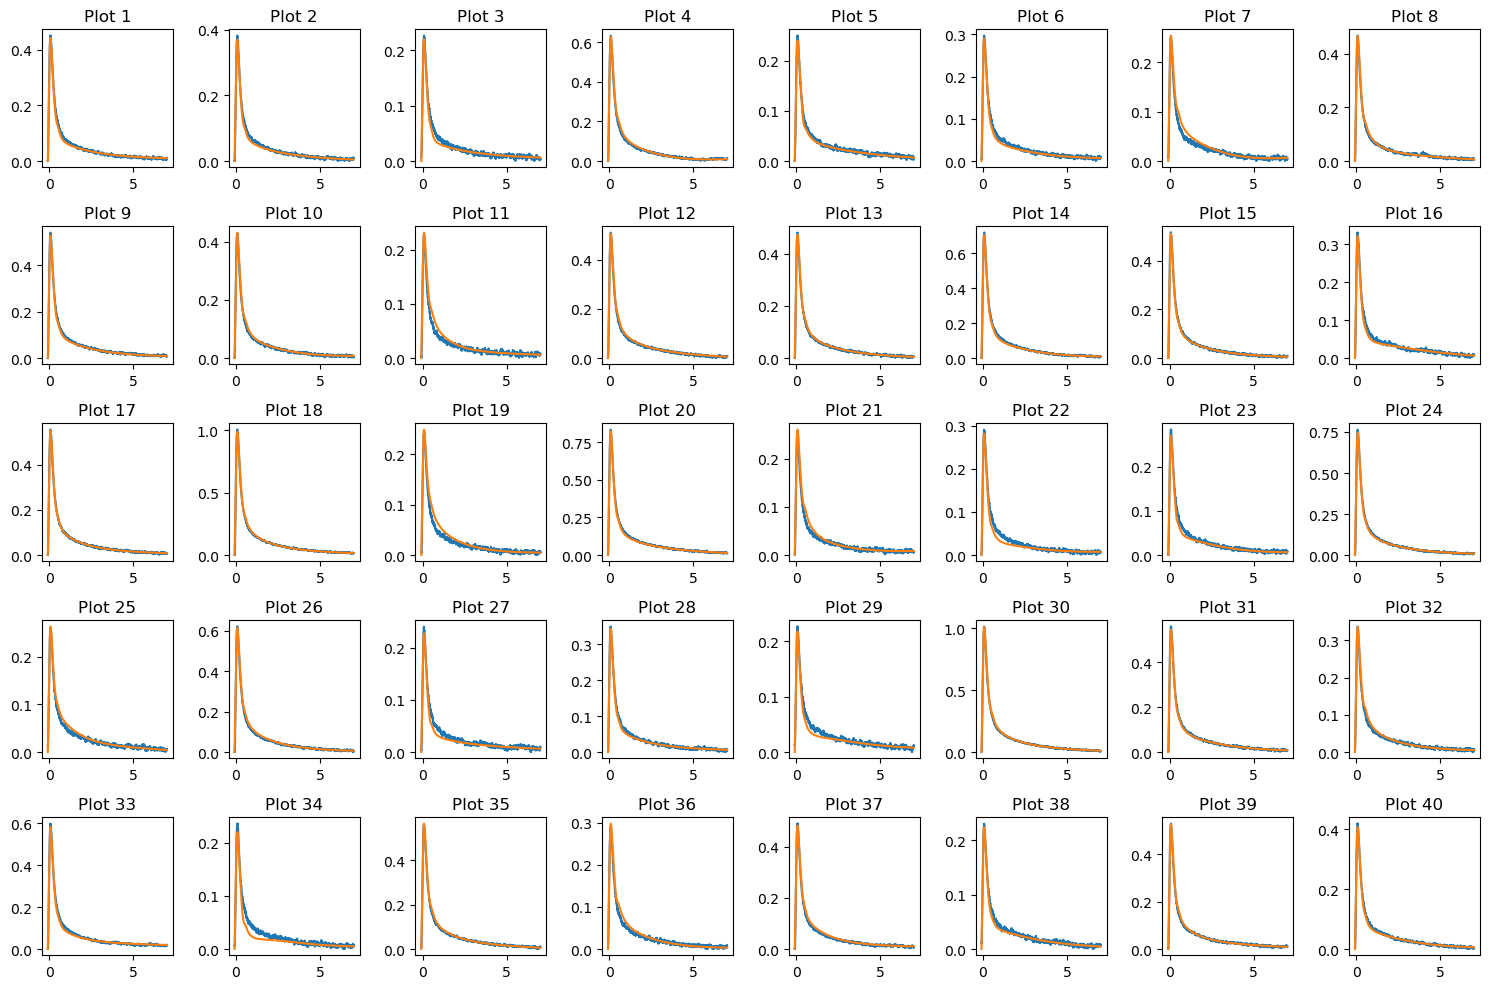

In [90]:
fig, axes = plt.subplots(5, 8, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot something in each subplot
for i in range(n):
    axes[i].plot(times,pulses[i])
    axes[i].plot(times,predictions[i])
    axes[i].set_title(f'Plot {i+1}')

# Adjust layout to prevent overlap

plt.tight_layout()
plt.show()

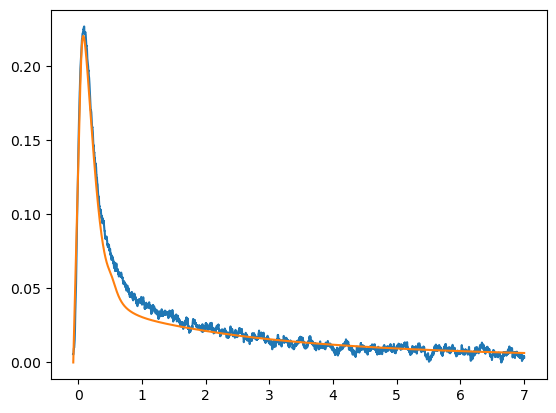

In [91]:
i = 3
plt.plot(times,pulses[i-1])
plt.plot(times,predictions[i-1])